<a href="https://colab.research.google.com/github/dhruvpandya1022/Chatroom/blob/main/CarEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Name:Dhruv Pandya</h3>
<h3>Sub: Machine Learning</h3>
<h3>Date: 8-10-2021</h3>
<h3>Dataset: car evaluation Dataset</h3>
<h4>Dataset Link: http://archive.ics.uci.edu/ml/datasets/Car+Evaluation</h4>

<h1>ML Term Assignment</h1>

In [ ]:
#Load EDA Packages
import pandas as pd
import numpy as np

In [ ]:
# Load Data Vis Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load ML Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import classification_report

In [ ]:
# For Neural Network (MultiLayerPerception)
from sklearn.neural_network import MLPClassifier

In [ ]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','Class']

In [ ]:
df = pd.read_csv("/content/sample_data/Car_dataset.csv",names=col_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1729 entries, nan to 1727.0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1729 non-null   object
 1   maint     1729 non-null   object
 2   doors     1729 non-null   object
 3   persons   1729 non-null   object
 4   lug_boot  1729 non-null   object
 5   safety    1729 non-null   object
 6   Class     1729 non-null   object
dtypes: object(7)
memory usage: 108.1+ KB


In [ ]:
#shape of the data
print("The data set {} rows and columns.".format(df.shape[0], df.shape[1]))

The data set 1729 rows and columns.


In [ ]:
# checking for any missing values
df.isna().any()

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
Class       False
dtype: bool

In [ ]:
#checking for duplicated rows
df.duplicated().any()

False

In [ ]:
#checking the values from each column
for col in df.columns:
    print("Column:",col)
    print(df[col].value_counts(),'\n')

Column: buying
high      432
med       432
vhigh     432
low       432
buying      1
Name: buying, dtype: int64 

Column: maint
high     432
vhigh    432
low      432
med      432
maint      1
Name: maint, dtype: int64 

Column: doors
5more    432
3        432
2        432
4        432
doors      1
Name: doors, dtype: int64 

Column: persons
more       576
2          576
4          576
persons      1
Name: persons, dtype: int64 

Column: lug_boot
big         576
small       576
med         576
lug_boot      1
Name: lug_boot, dtype: int64 

Column: safety
high      576
low       576
med       576
safety      1
Name: safety, dtype: int64 

Column: Class
unacc    1210
acc       384
good       69
vgood      65
class       1
Name: Class, dtype: int64 



In [ ]:
#plotting each column values
import plotly.graph_objects as go
for i in df.columns:
    labels = df[i].unique()
    values = df[i].value_counts()
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=go.layout.Title(text='Value distribution for columns "{}"'.format(i, x=5)))
    fig.show()

In [ ]:
#create category types
from pandas.api.types import CategoricalDtype
buying_type = CategoricalDtype(['low','med','high','vhigh'], ordered=True)
maint_type = CategoricalDtype(['low','med','high','vhigh'], ordered=True)
doors_type = CategoricalDtype(['2','3','4','5more'], ordered=True)
persons_type = CategoricalDtype(['2','4','more'], ordered=True)
lug_boot_type = CategoricalDtype(['small','med','big'], ordered=True)
safety_type = CategoricalDtype(['low','med','high'], ordered=True)
class_type = CategoricalDtype(['unacc','acc','good','vgood'], ordered=True)

In [ ]:
# convert all categorical values to category type
df.buying = df.buying.astype(buying_type)
df.maint = df.maint.astype(maint_type)
df.doors = df.doors.astype(doors_type)
df.persons = df.persons.astype(persons_type)
df.lug_boot = df.lug_boot.astype(lug_boot_type)
df.safety = df.safety.astype(safety_type)
df.Class = df.Class.astype(class_type)

In [ ]:
# Convert categories into integers for each column.
df.buying=df.buying.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
df.maint=df.maint.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
df.doors=df.doors.replace({'2':0, '3':1, '4':2, '5more':3})
df.persons=df.persons.replace({'2':0, '4':1, 'more':2})
df.lug_boot=df.lug_boot.replace({'small':0, 'med':1, 'big':2})
df.safety=df.safety.replace({'low':0, 'med':1, 'high':2})
df.Class=df.Class.replace({'unacc':0, 'acc':1, 'good':2, 'vgood':3})

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


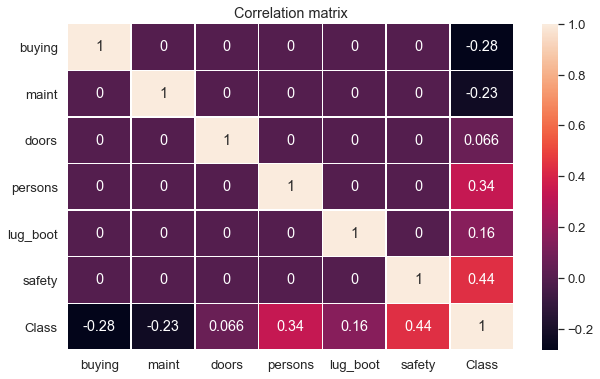

In [ ]:
#Displaying heat map
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),annot=True,linewidth=0.5)
plt.title('Correlation matrix');

In [ ]:
# Choose attribute columns and class column.
X=df[df.columns[:-1]]
y=df['Class']

In [ ]:
# Split to train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3>Logistic Regression</h3>

In [ ]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
pred=logreg.predict(X_test)

In [ ]:
print("Logistic Regression Accuracy Score:",logreg.score(X_test,y_test))

Logistic Regression Accuracy Score: 0.8188824662813102


<h4>Plotting Learning Curve</h4>

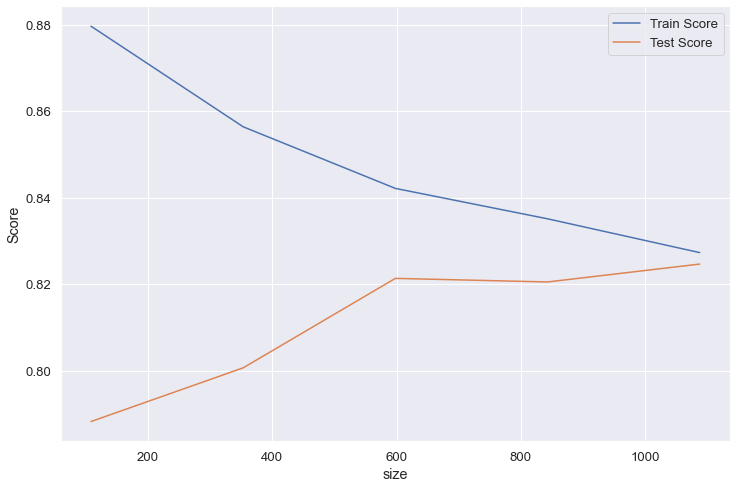

In [ ]:
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score,label="Train Score")
plt.plot(size,test_score,label="Test Score")
plt.xlabel("size")
plt.ylabel("Score")
plt.legend();

In [ ]:
#Regularizing Parameters
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,X_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1,)

In [ ]:
curve

(array([[0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.80351603, 0.81178904, 0.80661841, 0.81075491, 0.80578512],
        [0.82936918, 0.82936918, 0.8262668 , 0.82833506, 0.82644628]]),
 array([[0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.83057851, 0.77272727, 0.7892562 , 0.79752066, 0.81742739],
        [0.83471074, 0.79338843, 0.82644628, 0.83471074, 0.8340249 ]]))

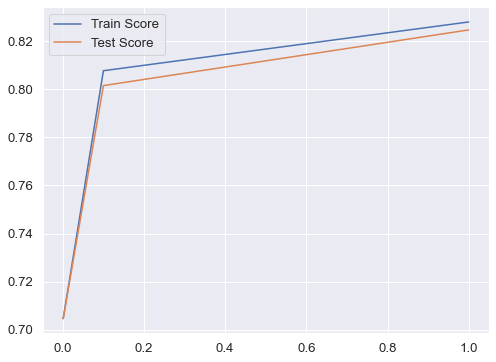

In [ ]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score,label="Train Score")
plt.plot(param_range,test_score,label="Test Score")
plt.legend()
plt.xticks=param_range

<p>From the plot c = 0.1 is giving good result</p>

<p>Now, as it is a multiclass classification, I tired using 'newton-cg','sag','lgfbs' solvers.</p>

In [ ]:
#Performing Grid Search
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']})

In [ ]:
print(grid.best_params_)
print("Grid Score:",grid.best_score_)

{'C': 10, 'multi_class': 'multinomial', 'solver': 'sag'}
Grid Score: 0.8304413428894757


<p>By comaring the logistic's score and grid search's score we can say that Grid search is perforing better than Logistic. We can get at accuary of 83%.</p>

<h3>KNN Classification</h3>

In [ ]:
#Now tring with the KNN classification
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)

In [ ]:
#Fitting Data
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("KNN Score:",knn.score(X_test,y_test))

KNN Score: 0.9094412331406551


<p>The KNN Classifier gives score of 90%</p>

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       358
           1       0.85      0.80      0.82       118
           2       0.65      0.58      0.61        19
           3       0.88      0.62      0.73        24

    accuracy                           0.91       519
   macro avg       0.83      0.75      0.78       519
weighted avg       0.91      0.91      0.91       519



<p>checking for various parameters for 'n_neighbours' and visualizing.</p>

In [ ]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

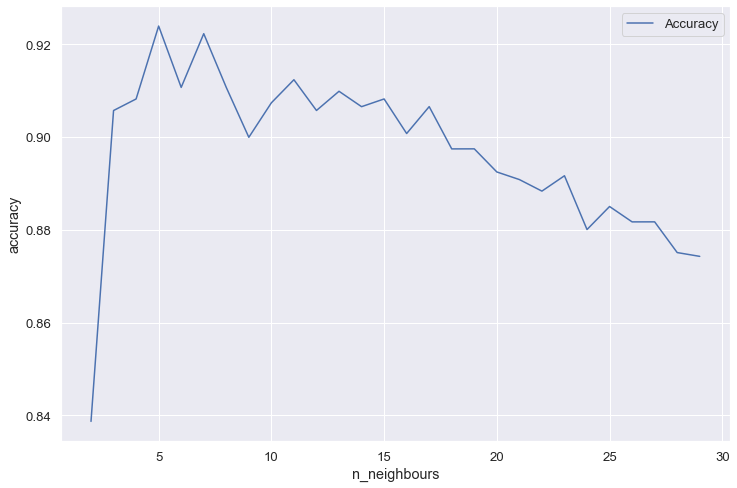

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
plt.plot(range(2,30),avg_score,label="Accuracy");
plt.legend();

<p>Accuracy score for KNN Neighbours is around 91%</p>

<h3>Decision Tree Classifier</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7919


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7916


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7916
Test set score: 0.7919


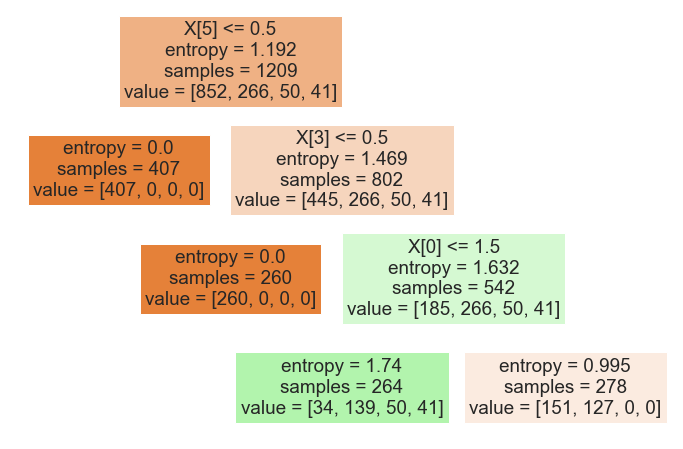

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train),filled = True); 

<h3>Random Forest Classifier</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
rfc.fit(X_train,y_train)
print("Train Score:",rfc.score(X_test,y_test))
print("Test Score",f1_score(y_test,rfc.predict(X_test),average='macro'))

Train Score: 0.9614643545279383
Test Score 0.9019701338850274


<p>By the score Random Forest Classifier is giving 96% Accuracy</p>

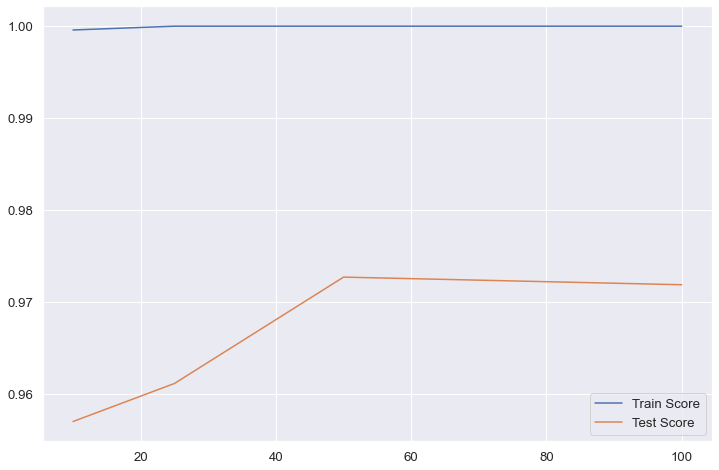

In [ ]:
param_range=[10,25,50,100]
curve=validation_curve(rfc,X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(12,8))
plt.plot(param_range,train_score,label="Train Score")
plt.plot(param_range,test_score,label="Test Score")
plt.xticks=param_range
plt.legend();

<p>With the increasing n_estimators, test accuracy is increasing. Model is evaluating best at n_estimators=50. After n_estimators=50,model starts overfitting. Now, we've reached approx. 96.3% accuracy.</p>

<p>check how the model fits for various values of 'max_features'</p>

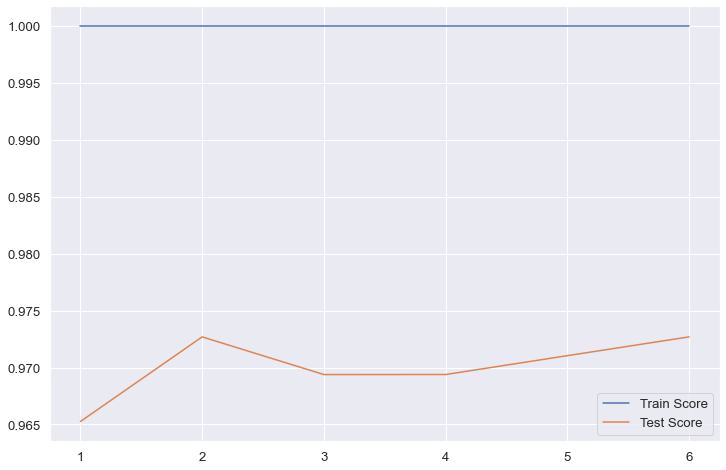

In [ ]:
param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),X_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(12,8))
plt.plot(param_range,train_score,label="Train Score")
plt.plot(param_range,test_score,label="Test Score")
plt.xticks=param_range
plt.legend();

<h4>Learning Curve</h4>

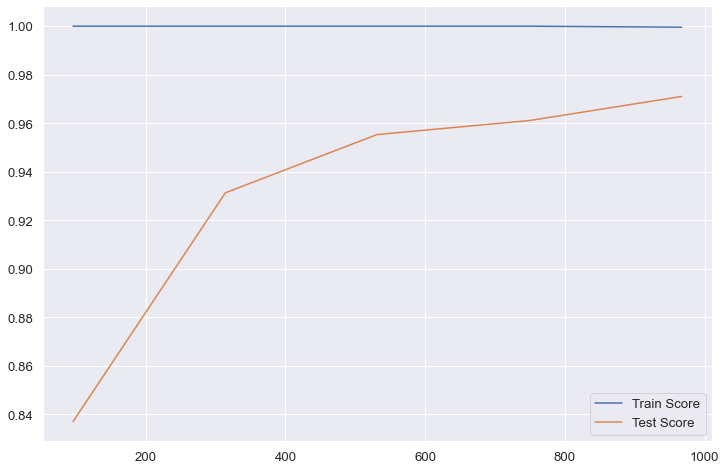

In [ ]:
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6,max_depth=10,random_state=51,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score,label="Train Score")
plt.plot(size,test_score,label="Test Score")
plt.legend();

<p>Model is overfitting as train accuracy is 1 ,but test accuracy is much less.</p>
<p>Changing RFC parameters to tackle overfitting. But, still it is not reduced. To reduce variance, these can be done</p>
<p>1. Increase number of samples. (It is clear from above graph that incresing number of samples will improve model)
2. Reduce number of features
</p>

In [ ]:
print(X.columns)
print(rfc.feature_importances_)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
[0.15562867 0.16062712 0.0604694  0.24376389 0.09517126 0.28433966]


<p>From feature importances, it is clear that 'doors' feature is least important. So, train our model excluding that feature.</p>

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['buying', 'maint', 'persons', 'lug_boot', 'safety']], y, test_size=0.3, random_state=42)

In [ ]:
rfc1=RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=5,max_depth=10,random_state=51,
    max_leaf_nodes=None,n_jobs=-1)
rfc1.fit(X_train1,y_train1)
print("Accuracy:",(rfc1.score(X_test1,y_test1)))

Accuracy: 0.930635838150289


<p>Our data already has less features and even if we drop the least important feature, then also the accuracy is reducing to 93.06%
So, dropping a feature is not an option to reduce variance in our model.
The only option we are left with is to get more data.</p>

<h3>Conclusion</h3>

<p>Random Forest Classifier is the best suitable model for this data with following parameters:
<p>n_estimators: 50</p>
<p>criterion: entropy</p>
<p>max_depth: 10</p>
<p>max_features: 6</p>
<p>max_leaf_nodes: None</p>

<p>We are able to achieve 93.06% accuracy with this model</p>